In [1]:
import pandas as pd
#loading the data
df=pd.read_excel("embeddingsdataoutNER.xlsx")
df.head(3)  

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.031465,-0.034812,0.030756,0.040378,0.007227,0.030501,-0.065226,0.038900,0.024625,-0.009061,...,-0.009358,-0.034958,-0.038740,0.018210,0.046137,0.021956,0.021862,-0.036457,-0.004126,0
1,0.012991,-0.034851,0.035680,0.033175,-0.001207,0.025135,-0.064407,0.047053,0.019216,-0.033921,...,-0.001166,-0.013945,-0.038726,0.034701,0.048698,0.021230,0.018160,-0.026270,-0.007308,0
2,0.037262,-0.029099,0.037346,0.046702,-0.000205,0.037258,-0.062410,0.037105,0.034219,-0.032791,...,-0.005624,-0.030894,-0.043402,0.026724,0.041012,0.018975,0.018383,-0.024389,-0.030969,0


In [2]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Label'])
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [3]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds,average='weighted')
    recall = recall_score(y_true,y_preds,average='weighted')
    f1 = f1_score(y_true,y_preds,average='weighted')
    metric_dict = { "accuracy"   : round(accuracy,2),
                    "precision"  : round(precision,2),
                    "recall"     : round(recall,2),
                    "f1 "        : round(f1,2)
                  }

    #print(accuracy)
    print(f"Acc        : {accuracy*100:.2f}%")
    print(f"Precision  : {precision*100:.2f}%")
    print(f"Recall     : {recall*100:.2f}%")
    print(f"F1_score   : {f1*100:.2f}%")
    return metric_dict

**Logistic REgression**

In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiating the Logistic Regression model
logreg = LogisticRegression()

# Fitting the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_preds = logreg.predict(X_train)
y_test_preds = logreg.predict(X_test)

# printing the metrics
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)

print(" ")
print(" ")

Report for train data
Acc        : 54.31%
Precision  : 39.05%
Recall     : 54.31%
F1_score   : 43.78%
  
  
  
Report for test data
Acc        : 56.67%
Precision  : 41.99%
Recall     : 56.67%
F1_score   : 45.98%
 
 


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

In [7]:
from sklearn.svm import SVC
# Instantiating the SVC model
svm = SVC(kernel='linear', random_state=42)
# model fitting on training data
svm.fit(X_train, y_train)
# Make predictions on both training and testing data
y_test_preds = svm.predict(X_test.values)
y_train_preds= svm.predict(X_train.values)

# printing the metrics
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)

print(" ")
print(" ")

Report for train data
Acc        : 53.47%
Precision  : 39.82%
Recall     : 53.47%
F1_score   : 42.95%
  
  
  
Report for test data
Acc        : 53.33%
Precision  : 40.85%
Recall     : 53.33%
F1_score   : 42.92%
 
 


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Classifier**

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Instantiating the RandomForest Classifier model
model = RandomForestClassifier()
# model fitting on training data
model.fit(X_train, y_train)
# Make predictions on both training and testing data
y_test_preds_rf = model.predict(X_test.values)
y_train_preds_rf= model.predict(X_train.values)

print(f"Report for train data")
evaluate_preds(y_train,y_train_preds_rf)
print("  ")
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds_rf)

print(" ")
print(" ")

Report for train data
Acc        : 99.72%
Precision  : 99.74%
Recall     : 99.72%
F1_score   : 99.73%
  
  
  
Report for test data
Acc        : 55.56%
Precision  : 51.49%
Recall     : 55.56%
F1_score   : 45.37%
 
 


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes**

In [9]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Check for Negative Values
print("Negative values in X_train:", np.any(X_train < 0))
print("Negative values in X_test:", np.any(X_test < 0))

# Handle Negative Values
X_train[X_train < 0] = 0
X_test[X_test < 0] = 0

# Creating and Fitting the Multinomial Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Making Predictions on test data
y_test_preds = nb.predict(X_test.values)
y_train_preds = nb.predict(X_train.values)

# Evaluate Predictions
print("Report for train data:")
evaluate_preds(y_train, y_train_preds)
print("\n\n")

print("Report for test data:")
evaluate_preds(y_test, y_test_preds)


Negative values in X_train: True
Negative values in X_test: True
Report for train data:
Acc        : 40.97%
Precision  : 16.79%
Recall     : 40.97%
F1_score   : 23.82%



Report for test data:
Acc        : 37.78%
Precision  : 14.27%
Recall     : 37.78%
F1_score   : 20.72%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.38, 'precision': 0.14, 'recall': 0.38, 'f1 ': 0.21}

**Decision Tree**

In [10]:
from sklearn.tree import DecisionTreeClassifier
# Instantiating the decisionTree Classifier model
des_trees = DecisionTreeClassifier(random_state=42)
# model fitting on training data
des_trees.fit(X_train, y_train)
# Making Predictions on test data
y_test_preds = des_trees.predict(X_test.values)
y_train_preds= des_trees.predict(X_train.values)

print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)

print(" ")
print(" ")


Report for train data
Acc        : 99.72%
Precision  : 99.72%
Recall     : 99.72%
F1_score   : 99.72%
  
  
  
Report for test data
Acc        : 37.78%
Precision  : 36.38%
Recall     : 37.78%
F1_score   : 36.90%
 
 


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiating the KNeighbors Classifier model
knn = KNeighborsClassifier(n_neighbors=5)
# model fitting on training data
knn.fit(X_train, y_train)
# Making Predictions on test data
y_test_preds = knn.predict(X_test.values)
y_train_preds=knn.predict(X_train.values)

print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)

print(" ")
print(" ")


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Report for train data
Acc        : 62.78%
Precision  : 62.47%
Recall     : 62.78%
F1_score   : 58.30%
  
  
  
Report for test data
Acc        : 51.11%
Precision  : 48.11%
Recall     : 51.11%
F1_score   : 45.24%
 
 


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ADA_Boost**

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


# Create an AdaBoost classifier
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
ada_boost.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_preds = ada_boost.predict(X_train.values)
y_test_preds = ada_boost.predict(X_test.values)

print(f"Report for train data")
evaluate_preds(y_train, y_train_preds)
print("  ")
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test, y_test_preds)

print(" ")
print(" ")


Report for train data
Acc        : 42.78%
Precision  : 34.40%
Recall     : 42.78%
F1_score   : 37.03%
  
  
  
Report for test data
Acc        : 38.33%
Precision  : 30.90%
Recall     : 38.33%
F1_score   : 33.63%
 
 


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Bagging Classifier**

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

# defining the BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

# Fitting the BaggingClassifier on the training data
bagging_classifier.fit(X_train, y_train)

# Predict on both train and test data
y_train_preds = bagging_classifier.predict(X_train.values)
y_test_preds = bagging_classifier.predict(X_test.values)

print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)

print(" ")
print(" ")


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Report for train data
Acc        : 64.31%
Precision  : 63.04%
Recall     : 64.31%
F1_score   : 61.50%
  
  
  
Report for test data
Acc        : 50.00%
Precision  : 44.03%
Recall     : 50.00%
F1_score   : 45.65%
 
 


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Clustering**

**k-mean Clustering**

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import numpy as np

# Generating some sample data
data = np.random.rand(100, 2)

# Specifying the number of clusters (k)
k = 3

# Applying K-Means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Accessing the cluster labels assigned to each data point
labels = kmeans.labels_

# Accessing the compactness measurement (inertia)
compactness = kmeans.inertia_

# Displaying the results
print("K-Means Clustering Results:")
print("Cluster Labels:", labels)
print("Compactness (Inertia):", compactness)


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Clustering Results:
Cluster Labels: [1 1 1 0 2 0 2 1 1 1 1 1 0 1 0 2 2 0 2 2 2 1 1 1 0 1 0 0 2 0 1 1 0 1 1 2 1
 1 1 0 2 0 2 2 0 0 0 0 0 0 0 0 2 2 0 1 2 2 1 2 1 1 2 1 2 1 1 1 2 1 1 2 1 0
 1 1 1 2 2 0 1 0 1 1 1 0 1 2 2 0 1 0 1 2 1 2 0 2 1 1]
Compactness (Inertia): 5.715580153794812


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


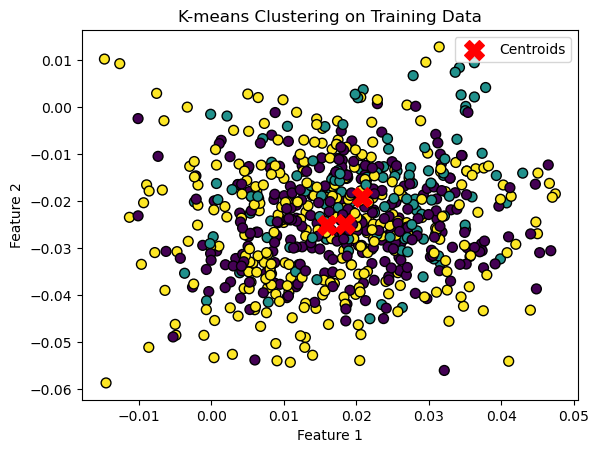

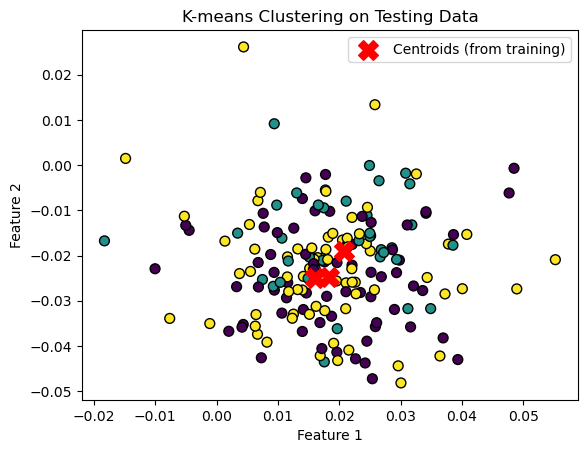

In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Extract features (X) and labels (y) from the DataFrame
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the number of clusters (k)
k = 3  

# Create KMeans instance and fit the training data
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)

# Get the cluster centroids and labels for the training set
centroids_train = kmeans.cluster_centers_
labels_train = kmeans.labels_

# Visualize the clusters and centroids on the training set
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=labels_train, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids_train[:, 0], centroids_train[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering on Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Predict the clusters on the testing set
labels_test = kmeans.predict(X_test)

# Visualize the clusters on the testing set
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=labels_test, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids_train[:, 0], centroids_train[:, 1], c='red', marker='X', s=200, label='Centroids (from training)')
plt.title('K-means Clustering on Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**Hyperparameter tunning**

**Grid_Search method for SVM**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create the grid search object for SVM
svm_grid_search = GridSearchCV(estimator=SVC(random_state=42),
                                param_grid=param_grid_svm,
                                cv=5,
                                scoring='accuracy')

# Fit the grid search to the data
svm_grid_search.fit(X_train, y_train)

# Print the best parameters for SVM
print("Best Parameters for SVM:", svm_grid_search.best_params_)

# Use the best estimator for prediction
svm_tuned = svm_grid_search.best_estimator_
y_test_preds_svm_tuned = svm_tuned.predict(X_test.values)
y_train_preds_svm_tuned = svm_tuned.predict(X_train.values)

# Evaluate the tuned SVM model
print("\nTuned SVM Model:")
print("Report for train data")
evaluate_preds(y_train, y_train_preds_svm_tuned)
print("\nReport for test data")
evaluate_preds(y_test, y_test_preds_svm_tuned)


Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Tuned SVM Model:
Report for train data
Acc        : 63.61%
Precision  : 67.14%
Recall     : 63.61%
F1_score   : 57.40%

Report for test data
Acc        : 58.89%
Precision  : 51.63%
Recall     : 58.89%
F1_score   : 50.70%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.59, 'precision': 0.52, 'recall': 0.59, 'f1 ': 0.51}

**HyperParameter tuning of Decision tree**

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fitting the grid search into the data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for prediction
des_trees_tuned = grid_search.best_estimator_
y_test_preds_tuned = des_trees_tuned.predict(X_test.values)
y_train_preds_tuned = des_trees_tuned.predict(X_train.values)

# Evaluate the tuned model
print("Tuned Model:")
print("Report for train data")
evaluate_preds(y_train, y_train_preds_tuned)
print(" ")
print("Report for test data")
evaluate_preds(y_test, y_test_preds_tuned)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Model:
Report for train data
Acc        : 80.97%
Precision  : 78.10%
Recall     : 80.97%
F1_score   : 79.00%
 
Report for test data
Acc        : 37.78%
Precision  : 34.25%
Recall     : 37.78%
F1_score   : 35.69%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.38, 'precision': 0.34, 'recall': 0.38, 'f1 ': 0.36}

**Hyperparameter tuning of Logistic regression**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Defining the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Creating the grid search object
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for prediction
logreg_tuned = grid_search.best_estimator_
y_test_preds_tuned = logreg_tuned.predict(X_test.values)
y_train_preds_tuned = logreg_tuned.predict(X_train.values)

# Evaluate the tuned model
print("Tuned Model:")
print("Report for train data")
evaluate_preds(y_train, y_train_preds_tuned)
print(" ")
print("Report for test data")
evaluate_preds(y_test, y_test_preds_tuned)


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Model:
Report for train data
Acc        : 61.67%
Precision  : 63.97%
Recall     : 61.67%
F1_score   : 54.16%
 
Report for test data
Acc        : 57.78%
Precision  : 47.11%
Recall     : 57.78%
F1_score   : 49.27%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.58, 'precision': 0.47, 'recall': 0.58, 'f1 ': 0.49}

**KNN**

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defining the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Creating the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for prediction
knn_tuned = grid_search.best_estimator_
y_test_preds_tuned = knn_tuned.predict(X_test.values)
y_train_preds_tuned = knn_tuned.predict(X_train.values)

# Evaluate the tuned model
print("Tuned Model:")
print("Report for train data")
evaluate_preds(y_train, y_train_preds_tuned)
print(" ")
print("Report for test data")
evaluate_preds(y_test, y_test_preds_tuned)


Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Tuned Model:
Report for train data
Acc        : 99.72%
Precision  : 99.72%
Recall     : 99.72%
F1_score   : 99.72%
 
Report for test data
Acc        : 53.33%
Precision  : 49.27%
Recall     : 53.33%
F1_score   : 49.02%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.53, 'precision': 0.49, 'recall': 0.53, 'f1 ': 0.49}

**Naive Bayes**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Defining the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Creating the grid search object
grid_search = GridSearchCV(estimator=GaussianNB(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for prediction
nb_tuned = grid_search.best_estimator_
y_test_preds_tuned = nb_tuned.predict(X_test.values)
y_train_preds_tuned = nb_tuned.predict(X_train.values)

# Evaluate the tuned model
print("Tuned Model:")
print("Report for train data")
evaluate_preds(y_train, y_train_preds_tuned)
print(" ")
print("Report for test data")
evaluate_preds(y_test, y_test_preds_tuned)


Best Parameters: {'var_smoothing': 1e-09}
Tuned Model:
Report for train data
Acc        : 60.83%
Precision  : 68.15%
Recall     : 60.83%
F1_score   : 62.23%
 
Report for test data
Acc        : 43.89%
Precision  : 52.25%
Recall     : 43.89%
F1_score   : 45.32%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.44, 'precision': 0.52, 'recall': 0.44, 'f1 ': 0.45}

**Bagging Classifier**

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Defining the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Defining the parameter grid for BaggingClassifier
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Create the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Creating the grid search object
grid_search_bagging = GridSearchCV(estimator=bagging_clf,
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')

# Fitting the grid search to the data
grid_search_bagging.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search_bagging.best_params_)

# Use the best estimator for prediction
bagging_tuned = grid_search_bagging.best_estimator_
y_test_preds_bagging_tuned = bagging_tuned.predict(X_test.values)
y_train_preds_bagging_tuned = bagging_tuned.predict(X_train.values)

# Evaluate the tuned model
print("Tuned Bagging Classifier:")
print("Report for train data")
evaluate_preds(y_train, y_train_preds_bagging_tuned)
print(" ")
print("Report for test data")
evaluate_preds(y_test, y_test_preds_bagging_tuned)


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-p

C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-p

C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-p

C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-p

Best Parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Tuned Bagging Classifier:
Report for train data
Acc        : 99.72%
Precision  : 99.72%
Recall     : 99.72%
F1_score   : 99.72%
 
Report for test data
Acc        : 54.44%
Precision  : 37.29%
Recall     : 54.44%
F1_score   : 43.69%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.54, 'precision': 0.37, 'recall': 0.54, 'f1 ': 0.44}

**Hyperparameter tuning for Random forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Creating the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for prediction
rf_tuned = grid_search.best_estimator_
y_test_preds_tuned = rf_tuned.predict(X_test.values)
y_train_preds_tuned = rf_tuned.predict(X_train.values)

# Evaluate the tuned model
print("Tuned Model:")
print("Report for train data")
evaluate_preds(y_train, y_train_preds_tuned)
print(" ")
print("Report for test data")
evaluate_preds(y_test, y_test_preds_tuned)


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leela\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\leela\anaconda3\Lib\site-packa

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model:
Report for train data
Acc        : 99.72%
Precision  : 99.72%
Recall     : 99.72%
F1_score   : 99.72%
 
Report for test data
Acc        : 57.22%
Precision  : 40.85%
Recall     : 57.22%
F1_score   : 46.22%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.57, 'precision': 0.41, 'recall': 0.57, 'f1 ': 0.46}

# hyperparameter tuning of adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    # Add more parameters if needed
}

# Creating the grid search object
grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for prediction
ada_boost_tuned = grid_search.best_estimator_
y_test_preds_tuned = ada_boost_tuned.predict(X_test.values)
y_train_preds_tuned = ada_boost_tuned.predict(X_train.values)

# Evaluate the tuned model
print("Tuned Model:")
print("Report for train data")
evaluate_preds(y_train, y_train_preds_tuned)
print(" ")
print("Report for test data")
evaluate_preds(y_test, y_test_preds_tuned)


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Tuned Model:
Report for train data
Acc        : 52.08%
Precision  : 36.60%
Recall     : 52.08%
F1_score   : 41.48%
 
Report for test data
Acc        : 48.33%
Precision  : 32.79%
Recall     : 48.33%
F1_score   : 37.87%


C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leela\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.48, 'precision': 0.33, 'recall': 0.48, 'f1 ': 0.38}